<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220903_Mobile_Price_Classification_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/03/05/mobile-price-classification-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
sns.set()

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


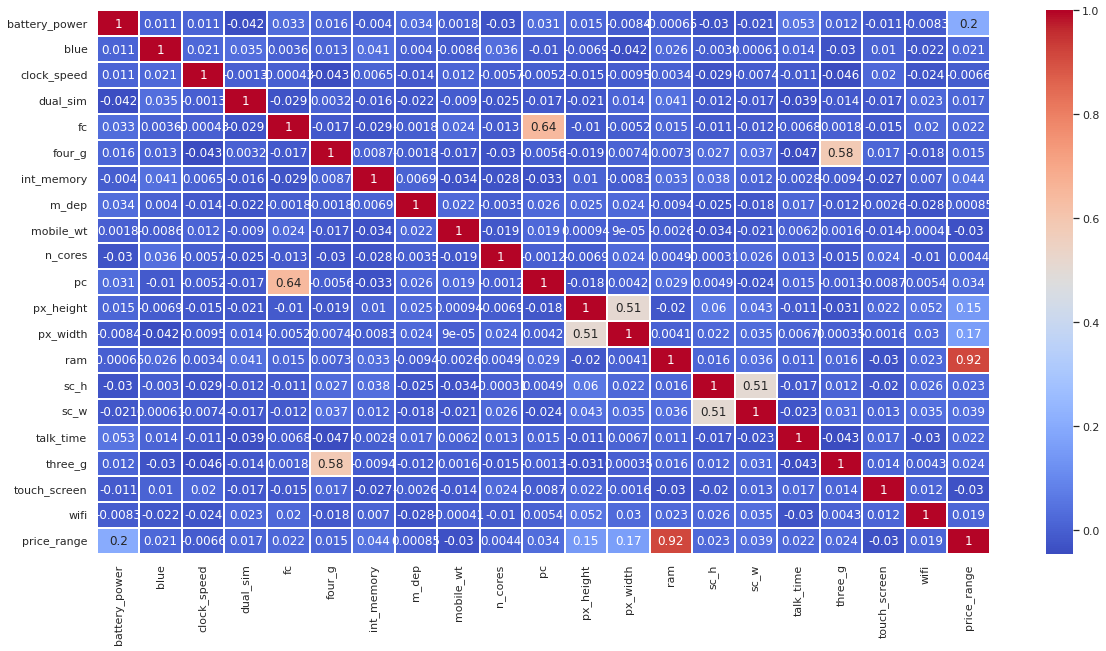

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
X = StandardScaler().fit_transform(x)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1600, 20), (400, 20), (1600,), (400,))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [21]:
ypred

array([2, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 2, 3, 0, 0, 3,
       2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 2, 1, 1, 1, 3, 3, 1, 1, 0, 2,
       3, 0, 2, 2, 3, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 3, 0, 2, 3, 3, 0, 2, 2, 3, 3, 3, 3, 0, 2, 3, 2, 3, 0, 3,
       2, 0, 2, 1, 0, 1, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 3, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 3, 2, 0, 3, 1, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 1,
       3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 1, 3, 1, 0, 1, 3, 3, 2, 1, 0, 3, 2,
       3, 0, 3, 0, 0, 1, 1, 0, 3, 0, 1, 0, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3,
       1, 2, 3, 0, 2, 3, 3, 1, 0, 2, 2, 3, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1,
       3, 1, 3, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 3, 3, 3, 0, 2,
       3, 2, 0, 3, 2, 2, 3, 1, 0, 3, 0, 3, 0, 2, 0, 0, 3, 2, 3, 1, 0, 0,
       3, 0, 3, 0, 1, 3, 2, 1, 3, 3, 2, 0, 2, 1, 1, 2, 0, 3, 0, 3, 0, 3,
       3, 3, 0, 3, 1, 0, 2, 3, 2, 3, 0, 3, 1, 2, 3, 1, 2, 2, 2, 0, 3, 2,
       3, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 3, 2, 3, 0,

In [22]:
accuracy = accuracy_score(ytest, ypred)
accuracy

0.9625

In [26]:
(unique, counts) = np.unique(ypred, return_counts=True)

In [27]:
counts

array([103,  93,  98, 106])

In [33]:
price_range = np.asarray((unique, counts)).T

In [34]:
price_range

array([[  0, 103],
       [  1,  93],
       [  2,  98],
       [  3, 106]])